In [9]:
import os
import re

In [10]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import utils

In [11]:
data_set=tf.keras.utils.get_file(
    fname="imdb.tar.gz",
    origin="http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz",
    extract=True)

In [16]:
def directory_data(directory):
    data={}
    data["review"]=[]
    for file_path in os.listdir(directory):
        with open(os.path.join(directory, file_path),"r",encoding='UTF8') as file:
            data["review"].append(file.read())
    
    return pd.DataFrame.from_dict(data)

In [17]:
def data(directory):
    pos_df=directory_data(os.path.join(directory,"pos"))
    neg_df=directory_data(os.path.join(directory,"neg"))
    pos_df["sentiment"]=1
    neg_df["sentiment"]=0
    
    return pd.concat([pos_df,neg_df])

In [18]:
train_df=data(os.path.join(os.path.dirname(data_set),"aclImdb","train"))
test_df=data(os.path.join(os.path.dirname(data_set),"aclImdb","test"))

In [19]:
train_df.head()

,review,sentiment
0,Bromwell High is a cartoon comedy. It ran at t...,1
1,Homelessness (or Houselessness as George Carli...,1
2,Brilliant over-acting by Lesley Ann Warren. Be...,1
3,This is easily the most underrated film inn th...,1
4,This is not the typical Mel Brooks film. It wa...,1


In [20]:
reviews=list(train_df['review'])

In [23]:
# 문자열 문장 리스트를 토크나이징
tokenized_reviews=[r.split() for r in reviews]

# 토크나이징된 리스트에 대한 각 길이를 저장
review_len_by_token=[len(t) for t in tokenized_reviews]

# 토크나이징된 것을 붙여서 음절의 길이를 저장
review_len_by_eumjeol=[len(s.replace(' ','')) for s in reviews]

Text(0, 0.5, 'Number of Reviews')

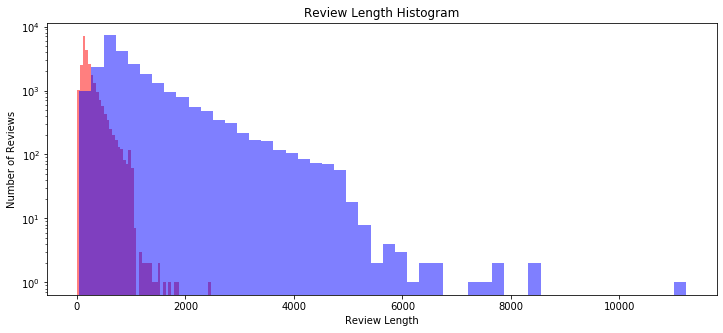

In [26]:
import matplotlib.pyplot as plt

# 그래프에 대한 이미지 크기 선언
# figsize:(가로,세로) 형태의 튜플로 입력
plt.figure(figsize=(12,5))
# 히스토그램 선언
# bins: 히스토그램 값에 대한 버킷 범위
# alpha: 그래프 색상 투명도
# color: 그래프 색상
# label: 그래프에 대한 라벨
plt.hist(review_len_by_token,bins=50,alpha=0.5,color='r',label='word')
plt.hist(review_len_by_eumjeol,bins=50,alpha=0.5,color='b',label='alphabet')
plt.yscale('log',nonposy='clip')
# 그래프 제목
plt.title('Review Length Histogram')
# 그래프 x 축 라벨
plt.xlabel('Review Length')
# 그래프 y 축 라벨
plt.ylabel('Number of Reviews')

In [27]:
import numpy as np

print('문장 최대 길이: {}'.format(np.max(review_len_by_token)))
print('문장 최초 길이: {}'.format(np.min(review_len_by_token)))
print('문장 평균 길이: {:.2f}'.format(np.mean(review_len_by_token)))
print('문장 길이 표준편차: {:.2f}'.format(np.std(review_len_by_token)))
print('문장 중간 길이: {}'.format(np.median(review_len_by_token)))
# 사분위에 대한 경우 0~100 스케일로 돼 있음
print('제1사분위 길이: {}'.format(np.percentile(review_len_by_token,25)))
print('제3사분위 길이: {}'.format(np.percentile(review_len_by_token,75)))

문장 최대 길이: 2470
문장 최초 길이: 10
문장 평균 길이: 233.79
문장 길이 표준편차: 173.73
문장 중간 길이: 174.0
제1사분위 길이: 127.0
제3사분위 길이: 284.0


{'whiskers': [<matplotlib.lines.Line2D at 0x1e81749a648>,
 'caps': [<matplotlib.lines.Line2D at 0x1e817531148>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e8161b3188>],
 'medians': [<matplotlib.lines.Line2D at 0x1e817531688>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e817486608>],
 'means': [<matplotlib.lines.Line2D at 0x1e817486f48>]}

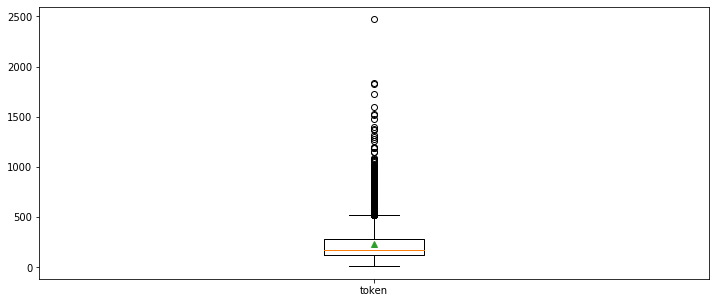

In [29]:
plt.figure(figsize=(12,5))
# 박스 플롯 생성
# 첫 번째 인자: 여러 분포에 대한 데이터 리스트를 입력
# labels: 입력한 데이터에 대한 라벨
# showmeans: 평균값을 마크함

plt.boxplot([review_len_by_token],labels=['token'],showmeans=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1e817553908>,
 'caps': [<matplotlib.lines.Line2D at 0x1e81755ab08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e817518848>],
 'medians': [<matplotlib.lines.Line2D at 0x1e81609fd48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e81745fa48>],
 'means': [<matplotlib.lines.Line2D at 0x1e8174aef08>]}

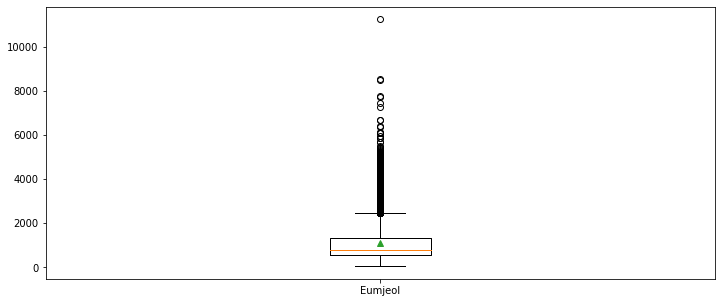

In [30]:
plt.figure(figsize=(12,5))
plt.boxplot([review_len_by_eumjeol],labels=['Eumjeol'],showmeans=True)

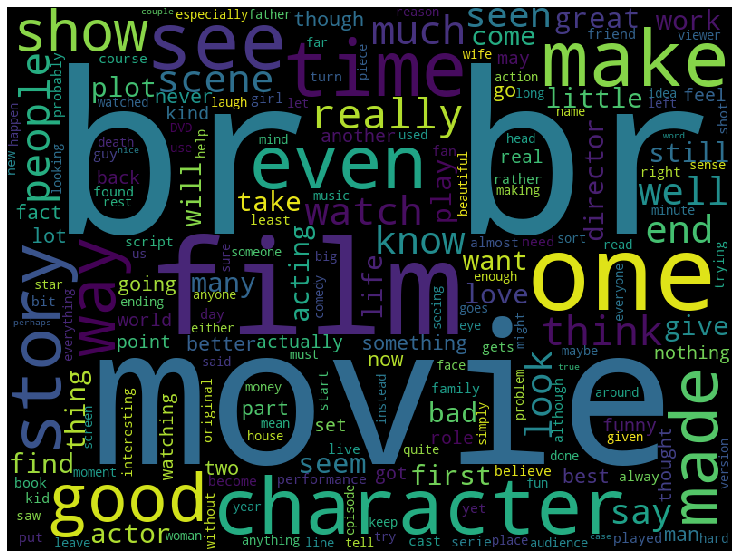

In [34]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

wordcloud=WordCloud(stopwords=STOPWORDS, background_color='black',width=800,height=600).generate(' '.join(train_df['review']))

plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

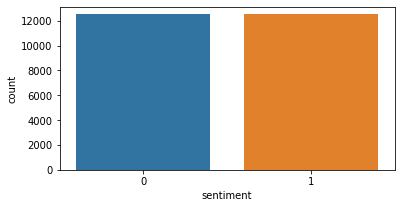

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sentiment=train_df['sentiment'].value_counts()
fig,axe=plt.subplots(ncols=1)
fig.set_size_inches(6,3)
sns.countplot(train_df['sentiment'])